In [10]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [112]:
data_email = pd.read_csv('./data/spam_email111.csv')
onlydata=data_email.loc[:,'make':'cap_total']
onlydata.describe(include='all')
data_email.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


In [100]:
X=onlydata.values
Class=data_email.values[:,57]
y=np.zeros((Class.size))
y[Class=='spam']=1
# Chia dữ liệu để traning và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state = 0)
# Chuẩn hóa bộ dữ liệu x_train và x_test
std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

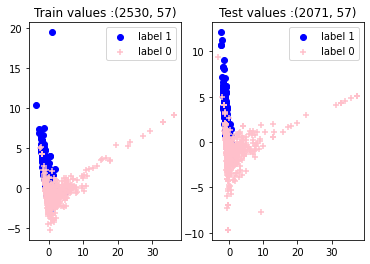

In [104]:
pca = PCA(n_components=2)
fig, (plttrain, plttest) = plt.subplots(1, 2)
datavl1=pca.fit_transform(X_train_scaled)
A1=datavl1[(y_train==1)]
A2=datavl1[(y_train==0)]
plttrain.set_title('Train values :'+ str(X_train_scaled.shape))
plttrain.scatter(A1[:,0],A1[:,1],c="Blue",marker='o')
plttrain.scatter(A2[:,0],A2[:,1],c="Pink",marker='+')
plttrain.legend(['label 1','label 0'])
datavl2=pca.fit_transform(X_test_scaled)
A11=datavl2[(y_test==1)]
A12=datavl2[(y_test==0)]
plttest.set_title('Test values :'+str(X_test_scaled.shape))
plttest.scatter(A11[:,0],A11[:,1],c="Blue",marker='o')
plttest.scatter(A12[:,0],A12[:,1],c="Pink",marker='+')
plttest.legend(['label 1','label 0'])
plt.savefig('lettersCG_Xtraintext.png')

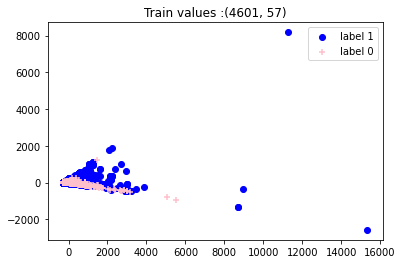

In [105]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca= PCA(n_components=2)
# fig, (plttrain, plttest) = plt.subplots(1, 2)
datavlx=pca.fit_transform(X)
Ax1=datavlx[(y==1)]
Ax2=datavlx[(y==0)]
plt.title('Train values :'+ str(X.shape))
plt.scatter(Ax1[:,0],Ax1[:,1],c="Blue",marker='o')
plt.scatter(Ax2[:,0],Ax2[:,1],c="Pink",marker='+')
plt.legend(['label 1','label 0'])
plt.savefig('lettersCG_X.png')

In [106]:
class RatingModel:
    def __init__(self, y_, y_Pr):
      self.y_=y_
      self.y_Pr=y_Pr
      self.TN=np.size(y_Pr[(y_Pr==-1)&(y_==y_Pr)])
      self.FN=np.size(y_Pr[(y_Pr==-1)&(y_!=y_Pr)])
      self.TP=np.size(y_Pr[(y_Pr==1)&(y_==y_Pr)])
      self.FP=np.size(y_Pr[(y_Pr==1)&(y_!=y_Pr)])
      self.y_[self.y_==0]=-1
      self.y_Pr[self.y_Pr==0]=-1
      # assert self.y_.set={1, -1}
      # assert self.y_Pr.set={1, -1}
    def __rep__():
        return ""
    def accur_Error(self, y_, y_Pr):
        rs=(self.TP+self.TN)/(y_.size)
        return [rs,(1-rs)]
    def sensitivity(self):
        P=np.size(self.y_[self.y_==1])
        return (self.TP)/(P)
    def specificity(self):
        N=np.size(self.y_[self.y_==-1])
        return (self.TN)/(N)
    def precision(self):
        rs=self.TP+self.FP
        return (self.TP)/(rs)
    def recall(self):
        rs=self.TP+self.FN
        return (self.TP)/(rs)
    def rating(self):
        return [self.accur_Error(self.y_, self.y_Pr), self.sensitivity(), self.specificity(), self.precision(), self.recall()]

In [107]:
class DecisionStump:
    def __init__(self, T=100):
        self.T = T
        pass

    def fit(self, X: np.ndarray, y: np.ndarray, sample_weight: np.ndarray):
        T = self.T
        W=sample_weight
        nrow, ncol = X.shape
        assert nrow == y.size

        bestn = 0
        bestd = 1
        bestp = 0
        minerr = W.sum()
        for i in range(ncol):
            err, d, p = self._optimize(X[:, i], y, W, T)
            if err < minerr:
                minerr = err
                bestn = i
                bestd = d
                bestp = p
        
        self.features = ncol
        self.bestn = bestn
        self.bestd = bestd
        self.bestp = bestp

        return self

    def _optimize(self, X, y, W, T):
        X = X.flatten()
        min_x, max_x = X.min(), X.max()
        len_x = max_x - min_x
        
        bestd = 1
        bestp = min_x
        minerr = W.sum()

        if len_x > 0.0:
            for p in np.arange(min_x, max_x, len_x/T):
                for d in [-1, 1]:
                    gy = np.ones((y.size))
                    gy[X*d < p*d] = -1
                    err = np.sum((gy != y)*W)
                    if err < minerr:
                        minerr = err
                        bestd = d
                        bestp = p

        return minerr, bestd, bestp

    def predict(self, test_set : np.ndarray):
        nrow, ncol = test_set.shape

        assert ncol == self.features

        icol = test_set[:, self.bestn]
        h = np.ones((nrow))
        h[icol*self.bestd < self.bestp*self.bestd] = -1
        return h

In [113]:
class AdaBoost:
    def __init__(self , T, hmodel = DecisionStump()):
        self.T=T
        self.hmodel=hmodel
    def fit(self, X: np.ndarray, y_: np.ndarray, verbose=False):
      n = X.shape[0]
      T = self.T
      y=y_
      y[y==0]=-1
    # init numpy arrays
      self.D = np.zeros(shape=(T, n))
      self.h = np.zeros(shape=T, dtype=object)
      self.alpha = np.zeros(shape=T)
      self.errors = np.zeros(shape=T)
      self.ratting = np.zeros(shape=(T,2))

      # initialize weights uniformly
      self.D[0] = np.ones(shape=n) / n

      for t in range(T):
          # fit  weak learner
          D_ = self.D[t]
          h_ = DecisionStump(60)
          h_ = h_.fit(X, y, D_)

          # calculate error and stump weight from weak learner prediction
          Pr_ = h_.predict(X)
          error_ = D_[(Pr_ != y)].sum()# / n
          alpha_ = np.log((1 - error_) / error_) / 2

          # update sample weights
          D_new = (
              D_ * np.exp(-alpha_ * y * Pr_)
          )
          
          D_new /= D_new.sum()

          # If not final iteration, update sample weights for t+1
          if t+1 < T:
              self.D[t+1] = D_new

          # save results of iteration
          self.h[t] = h_
          self.alpha[t] = alpha_
          self.errors[t] = error_
          # ae=np.array([0,0])
          if t>0:
            Pr_temp=self.predictmodul(X,t)
            modelra=RatingModel(y, Pr_temp)
            self.ratting[t,:]=modelra.accur_Error(y, Pr_temp)
          if verbose: print('Training {0}-th weak classifier: accuracy={1}, error={2}'.format (t, self.ratting[t,0], self.ratting[t,1]))
      return self
    def predict(self, X):
        Pr_ = np.array([h_.predict(X) for h_ in self.h])
        return np.sign(np.dot(self.alpha, Pr_))
    def predictmodul(self, X, i):
        h_temp=self.h[:i]
        alpha_temp=self.alpha[:i]
        Pr_ = np.array([h_.predict(X) for h_ in h_temp])
        return np.sign(np.dot(alpha_temp, Pr_))

In [109]:
model=AdaBoost(25)
model=model.fit(X_train_scaled, y_train,  True )
Pr=model.predict( X_test_scaled)
Pr[(Pr==0)]=-1

Training 0-th weak classifier: accuracy=0.0, error=0.0
Training 1-th weak classifier: accuracy=0.7845849802371542, error=0.21541501976284583
Training 2-th weak classifier: accuracy=0.7845849802371542, error=0.21541501976284583
Training 3-th weak classifier: accuracy=0.8454545454545455, error=0.15454545454545454
Training 4-th weak classifier: accuracy=0.8379446640316206, error=0.1620553359683794
Training 5-th weak classifier: accuracy=0.8778656126482214, error=0.12213438735177862
Training 6-th weak classifier: accuracy=0.8794466403162056, error=0.12055335968379444
Training 7-th weak classifier: accuracy=0.8869565217391304, error=0.11304347826086958
Training 8-th weak classifier: accuracy=0.8905138339920948, error=0.10948616600790517
Training 9-th weak classifier: accuracy=0.8936758893280632, error=0.10632411067193681
Training 10-th weak classifier: accuracy=0.8992094861660079, error=0.10079051383399207
Training 11-th weak classifier: accuracy=0.9035573122529644, error=0.0964426877470355

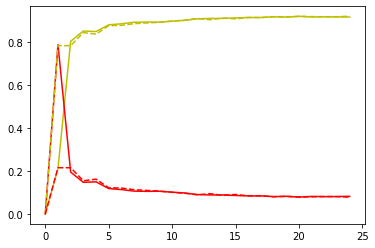

In [110]:
ra_Xtest = np.zeros(shape=(model.T,2))
for i in range(1,model.T):
  Pr_i=model.predictmodul(X_test_scaled,i)
  modelra=RatingModel(y_test, Pr_i)
  ra_Xtest[i,:]=modelra.accur_Error(y_test, Pr_i)
ra_Xtrain = np.zeros(shape=(model.T,2))
for i in range(1,model.T):
  Pr_i=model.predictmodul(X_train_scaled,i)
  modelra=RatingModel(y_train, Pr_i)
  ra_Xtrain[i,:]=modelra.accur_Error(y_train, Pr_i)
iter=range(model.T)
plt.plot(iter,ra_Xtest[:,0],'y-', label='Test accuracy')
plt.plot(iter,ra_Xtest[:,1],'r-', label='Test error')
plt.plot(iter,ra_Xtrain[:,0],'y--', label='Train accuracy')
plt.plot(iter,ra_Xtrain[:,1],'r--', label='Train error')

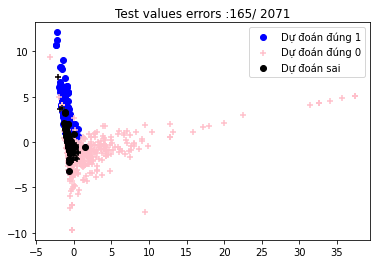

In [111]:
sumerror=0;
y_new=y_test
y_new[y_new==0]=-1
# for i in range(y_new.shape[0]):
#   if y_new[i]!=Pr[i]: 
#     sumerror+=1
sumerror=np.size(y_new[Pr!=y_new])
gT1=datavl2[(Pr==1)]
gT0=datavl2[(Pr==-1)]
gF1=datavl2[(y_new!=Pr)&(Pr==1)]
gF0=datavl2[(y_new!=Pr)&(Pr==-1)]
plt.title('Test values errors :'+str(sumerror)+'/ '+str(X_test_scaled.shape[0]))
plt.scatter(gT1[:,0],gT1[:,1],c="Blue", marker='o')
plt.scatter(gT0[:,0],gT0[:,1],c="Pink", marker='+')
plt.scatter(gF1[:,0],gF1[:,1], c="black", marker='o')
plt.scatter(gF0[:,0],gF0[:,1], c="black", marker='+')
plt.legend(['Dự đoán đúng 1', 'Dự đoán đúng 0', 'Dự đoán sai'])
plt.savefig('lettersCG_XtextError.png')